In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, cohen_kappa_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest,stats
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE



dataset  =  pd.read_csv("dataset.csv")
dataset = dataset.dropna()

dataset.head(3)
dataset.info()



### Korelasyon matrixi
df = pd.DataFrame(dataset)
# 2. Korelasyon matrisi hesapla
#correlation_matrix = df.corr()
#plt.figure(figsize=(14, 14))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Korelasyon Matrisi Heatmap")
#plt.show()




#dataset  preproccess
y  = dataset["infected"]

#x = dataset.drop("infected",axis=1)

#Seçilen özellikler ile
x  = dataset[['cd40', 'cd420', 'age', 'time', 'cd820', 'cd80', 'preanti', 'karnof', 'strat', 'trt']]
# Sayısal sütunları al

# "infected" sütununda kaç tane 1 olduğunu sayma
count_ones = dataset['infected'].value_counts()[1]

print(f"'infected' sütununda {count_ones} tane 1 var.")


numeric_columns = x.select_dtypes(include=np.number).columns

# Log dönüşümünü uygulayalım
log_transformed_data = x.copy()

for feature in numeric_columns:
    min_value = log_transformed_data[feature].min()
    if min_value <= 0:
        log_transformed_data[feature] += abs(min_value) + 1  # Sıfır ve negatif değerleri pozitife çevir
    log_transformed_data[feature] = np.log(log_transformed_data[feature])  # Log dönüşümünü uygula

# Log dönüşüm sonrası
print("Log dönüşümü tamamlandı.")
print(log_transformed_data.head())

# Log dönüşüm sonrası dengelenmiş veri
x = log_transformed_data






# SMOTE ile dengeleme
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

# Yeni dengenin kontrolü
print(pd.Series(y).value_counts())


#numeric_columns = x.select_dtypes(include=np.number).columns

# K-S testi sonuçlarını saklamak için bir liste
#ks_results = []

# Her bir sayısal sütun için K-S testini uygula
#for column in numeric_columns:
 #   data = x[column]
    # Veriyi normalize et (isteğe bağlı, eğer standart normal ile karşılaştırıyorsan)
  #  standardized_data = (data - data.mean()) / data.std()

    # Kolmogorov-Smirnov testi
   # stat, p_value = kstest(standardized_data, 'norm')
    #ks_results.append({
     #   'Feature': column,
      #  'Statistic': stat,
       # 'P-value': p_value,
        #'Normal Distribution': 'Yes' if p_value > 0.05 else 'No'
   # })

# Sonuçları DataFrame olarak göster
#ks_df = pd.DataFrame(ks_results)
#print(ks_df)








# Sadece tek bir katmanı almak için StratifiedKFold'u kullanıyoruz
# StratifiedKFold kullanarak veriyi 5 katmanda bölelim
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state =7)



# Cross-validation için döngü
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]




# Eğitim ve test setlerinin boyutlarını yazdır
    print(f"Train set size: {len(x_train)}")
    print(f"Test set size: {len(x_test)}")
    print("-" * 30)
    print(y_train.value_counts())

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)





# Mutual Information hesaplama
#mutual_info = mutual_info_classif(x[numeric_columns], y, discrete_features=False)
#mutual_info_series = pd.Series(mutual_info, index=numeric_columns)

# Mutual Information sonuçlarını görselleştirme
#plt.figure(figsize=(8, 6))
#mutual_info_series.sort_values(ascending=False).plot(kind='bar', color='skyblue')
#plt.title("Mutual Information Scores")
#plt.xlabel("Features")
#plt.ylabel("Mutual Information")
#plt.grid(axis='y')
#plt.show()

# En yüksek Mutual Information değerine sahip ilk 10 özelliği seçme
#selected_features = mutual_info_series.sort_values(ascending=False).head(10).index.tolist()
#print("Seçilen Özellikler:", selected_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


infected
1    34494
0    34494
Name: count, dtype: int64
Train set size: 55190
Test set size: 13798
------------------------------
infected
1    27595
0    27595
Name: count, dtype: int64
Train set size: 55190
Test set size: 13798
------------------------------
infected
1    27595
0    27595
Name: count, dtype: int64
Train set size: 55190
Test set size: 13798
------------------------------
infected
1    27595
0    27595
Name: count, dtype: int64
Train set size: 55191
Test set size: 13797
------------------------------
infected
0    27596
1    27595
Name: count, dtype: int64
Train set size: 55191
Test set size: 13797
------------------------------
infected
1    27596
0    27595
Name: count, dtype: int64


4862
2036
4577
2322
Accuracy: 0.684
Sensitivity : 0.677
Specificity: 0.692
Precision: 0.705
F1 Score: 0.684
Cohen's Kappa: 0.368
AUC: 0.684


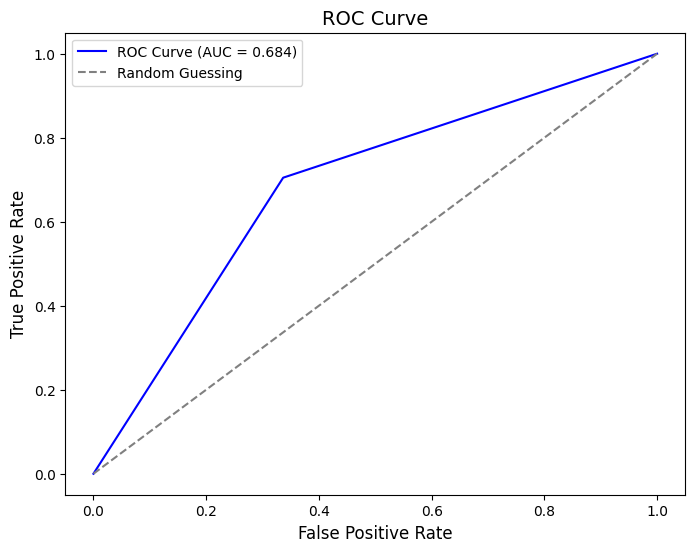

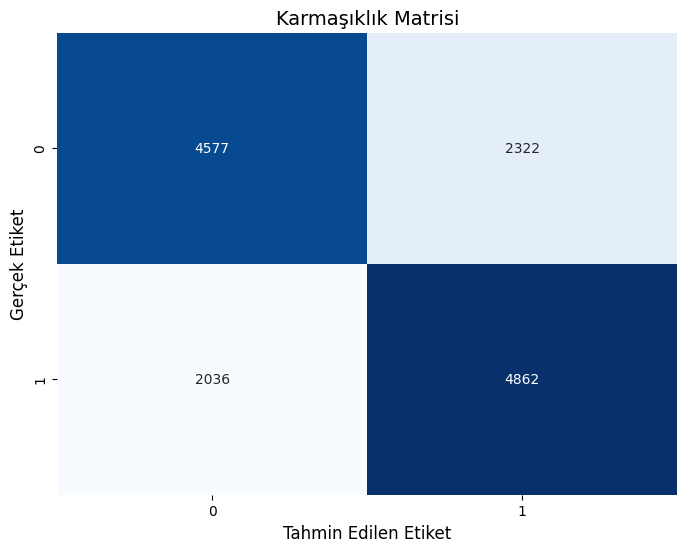

In [ ]:
#Decision Tree  Model oluşturulması
decTree = DecisionTreeClassifier()

decTreeModel = decTree.fit(x_train,y_train)

y_pred = decTreeModel.predict(x_test)
decTreeModel.score(x_test,y_test)

cm = confusion_matrix(y_test,y_pred)

TN,FN,FP,TP  = cm.ravel()
print(TP)
print(FP)
print(TN)
print(FN)

# Manuel hesaplama
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1 = 2 * (specificity * sensitivity) / (specificity + sensitivity)

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity : {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")


y_pred_proba = decTreeModel.predict_proba(x_test)[:, 1]  # Pozitif sınıf için olasılık


# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.3f}")


# ROC ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")


# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend()
plt.show()



plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
plt.ylabel('Gerçek Etiket', fontsize=12)
plt.title('Karmaşıklık Matrisi', fontsize=14)
plt.show()



#decision tree  grafik çizdirme
#dot = export_graphviz(decTree)
#graph = graphviz.Source(dot)
#graph


5459
1439
4427
2472
Accuracy: 0.717
Sensitivity : 0.688
Specificity: 0.755
Precision: 0.791
F1 Score: 0.720
Cohen's Kappa: 0.433
AUC: 0.776


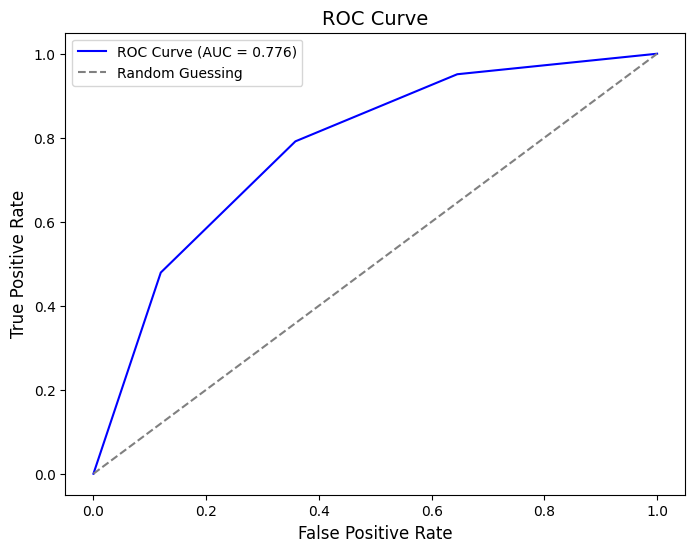

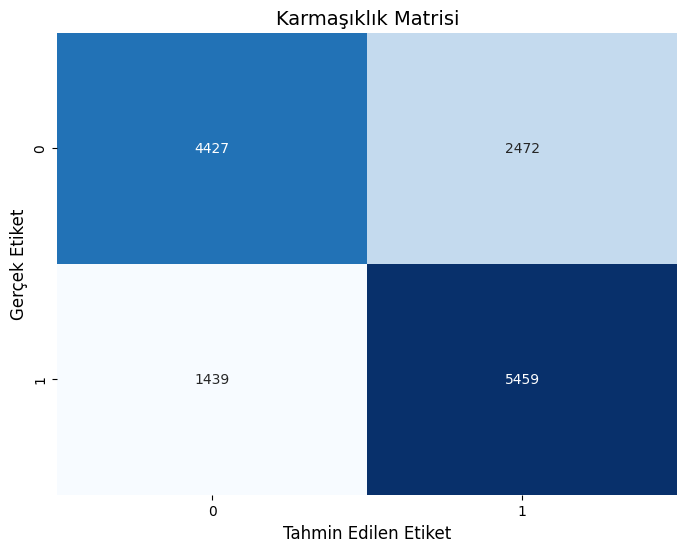

In [ ]:
#K Near Neighbour Model oluşturulması
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knnModel = knn.fit(x_train,y_train)
y_pred = knnModel.predict(x_test)


cm = confusion_matrix(y_test,y_pred)

TN,FN,FP,TP  = cm.ravel()
print(TP)
print(FP)
print(TN)
print(FN)

# Manuel hesaplama
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1 = 2 * (specificity * sensitivity) / (specificity + sensitivity)

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity : {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")


y_pred_proba = knnModel.predict_proba(x_test)[:, 1]  # Pozitif sınıf için olasılık


# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.3f}")


# ROC ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")


# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
plt.ylabel('Gerçek Etiket', fontsize=12)
plt.title('Karmaşıklık Matrisi', fontsize=14)
plt.show()

Model Skoru: 0.639
True Positive: 5248
False Positive: 3337
True Negative: 3562
False Negative: 1650
Accuracy: 0.639
Sensitivity: 0.761
Specificity: 0.516
Precision: 0.611
F1 Score: 0.678
Cohen's Kappa: 0.277
AUC: 0.685


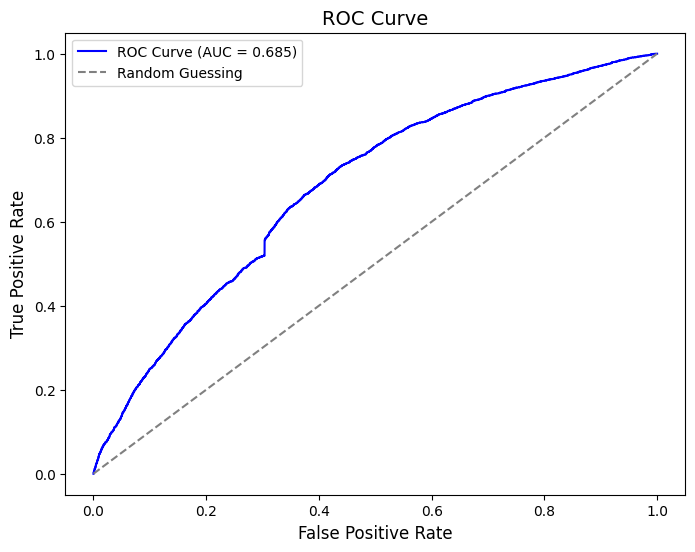

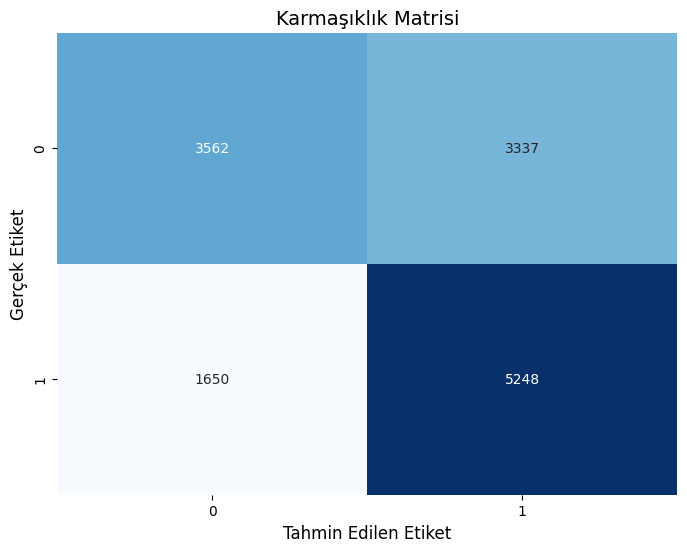

In [ ]:
# Destek Vektör Makinesi (SVM) Modeli
svm = SVC(kernel="linear", random_state=7, probability=True)  # probability=True eklendi
svmModel = svm.fit(x_train, y_train)

# Model Skoru
score = svmModel.score(x_test, y_test)
print(f"Model Skoru: {score:.3f}")

# Tahminler
y_pred = svmModel.predict(x_test)

# Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

# Manuel hesaplamalar
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if TP + FN != 0 else 0  # Bölme sıfır hatası için kontrol
specificity = TN / (TN + FP) if TN + FP != 0 else 0  # Bölme sıfır hatası için kontrol
precision = TP / (TP + FP) if TP + FP != 0 else 0  # Bölme sıfır hatası için kontrol
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if precision + sensitivity != 0 else 0

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.3f}")

# ROC ve AUC
y_pred_proba = svm.predict_proba(x_test)[:, 1]  # Pozitif sınıf için olasılık
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")

# ROC Eğrisini Çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend()
plt.show()

# Karmaşıklık Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
plt.ylabel('Gerçek Etiket', fontsize=12)
plt.title('Karmaşıklık Matrisi', fontsize=14)
plt.show()


Epoch 1/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6302 - loss: 0.6519
Epoch 2/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6426 - loss: 0.6401
Epoch 3/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6446 - loss: 0.6378
Epoch 4/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6407 - loss: 0.6397
Epoch 5/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6462 - loss: 0.6356
Epoch 6/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6481 - loss: 0.6342
Epoch 7/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6429 - loss: 0.6373
Epoch 8/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6418 - loss: 0.6386
Epoch 9/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6486 - loss: 0.6339
Epoch 10/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6471 - loss: 0.6346
Epoch 11/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6509 - loss: 0.6323
Epoch 12/100
1725/1

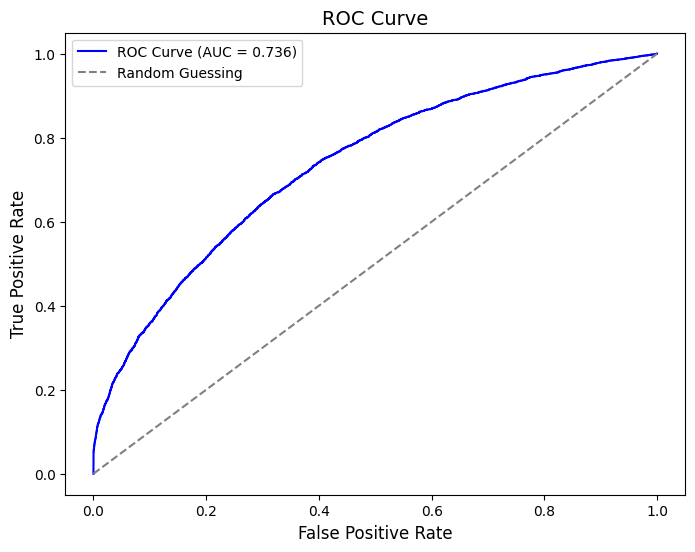

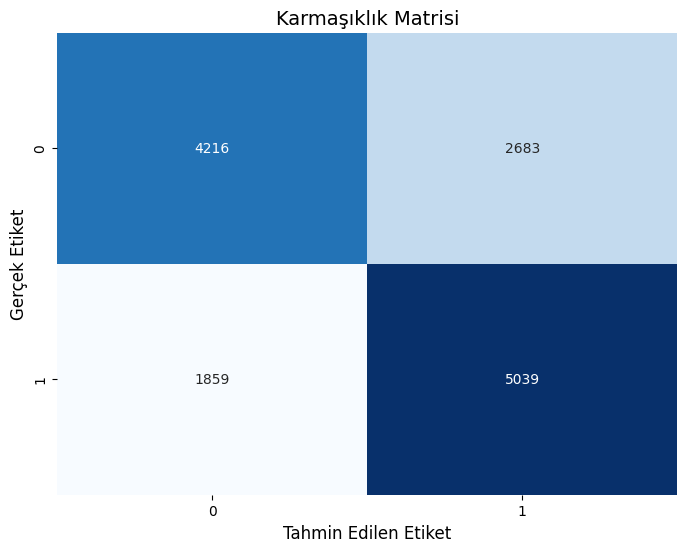

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6409 - loss: 0.6192
Modelin Test Doğruluğu: 67.08%


In [ ]:
# Yapay Sinir Ağı Modeli
ysa = tf.keras.models.Sequential()

ysa.add(tf.keras.layers.Dense(units=11, activation="relu"))
ysa.add(tf.keras.layers.Dense(units=11, activation="relu"))
ysa.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

ysa.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Modeli Eğitme
history = ysa.fit(x_train, y_train, epochs=100)

# Tahminler
y_pred = ysa.predict(x_test)

# 0.5'ten büyük olasılıkları 1, küçük olasılıkları 0 olarak sınıflandırma
y_pred_binary = (y_pred > 0.5).astype(int)

# Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred_binary)
TN, FP, FN, TP = cm.ravel()
print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

# Manuel Hesaplamalar
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1 = 2 * (specificity * sensitivity) / (specificity + sensitivity)

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred_binary)
print(f"Cohen's Kappa: {kappa:.3f}")

# ROC ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred.ravel())  # y_pred zaten olasılık
auc = roc_auc_score(y_test, y_pred.ravel())  # y_pred.ravel() olasılıkları döndürür
print(f"AUC: {auc:.3f}")

# ROC Eğrisini Çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend()
plt.show()

# Karmaşıklık Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
plt.ylabel('Gerçek Etiket', fontsize=12)
plt.title('Karmaşıklık Matrisi', fontsize=14)
plt.show()

# Test Doğruluğunu Hesapla
_, test_accuracy = ysa.evaluate(x_test, y_test)
print(f"Modelin Test Doğruluğu: {test_accuracy * 100:.2f}%")

5157
1741
5441
1458
Accuracy: 0.768
Sensitivity : 0.780
Specificity: 0.758
Precision: 0.748
F1 Score: 0.768
Cohen's Kappa: 0.536
AUC: 0.855


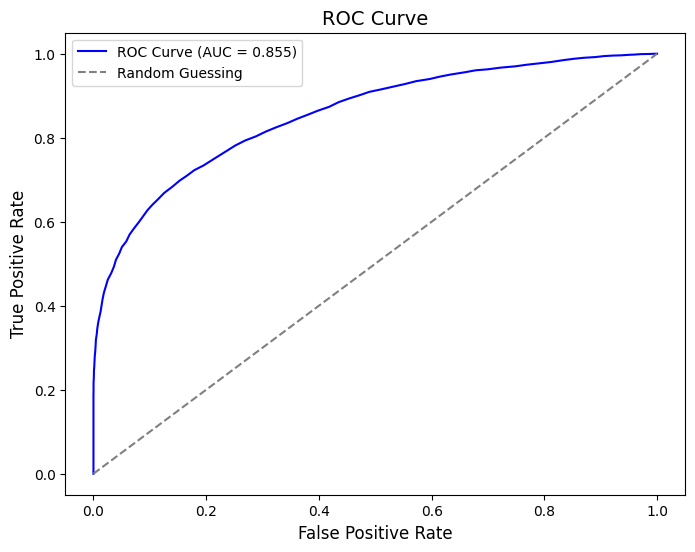

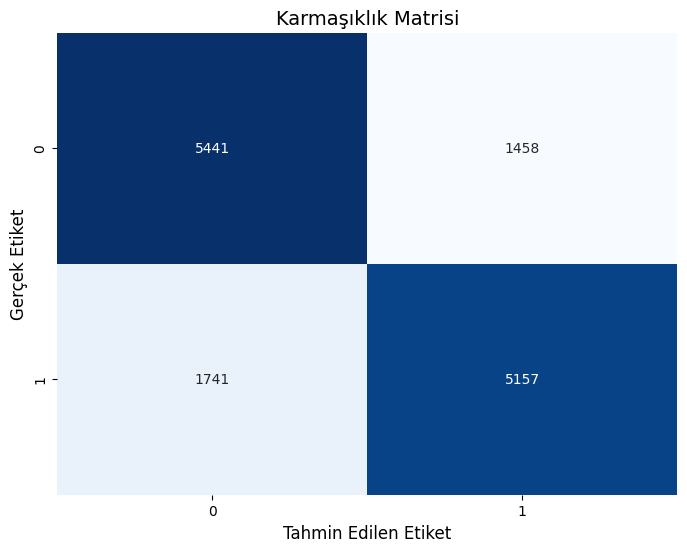

In [ ]:
#Random Forest Classifier

forest = RandomForestClassifier()

forest.fit(x_train,y_train)


forest.score(x_test,y_test)

y_pred = forest.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

TN,FN,FP,TP  = cm.ravel()
print(TP)
print(FP)
print(TN)
print(FN)

# Manuel hesaplama
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1 = 2 * (specificity * sensitivity) / (specificity + sensitivity)

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity : {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

y_pred_proba = forest.predict_proba(x_test)[:, 1]  # Pozitif sınıf için olasılık

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.3f}")


# ROC ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")


# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
plt.ylabel('Gerçek Etiket', fontsize=12)
plt.title('Karmaşıklık Matrisi', fontsize=14)
plt.show()

